In [1]:
import numpy as np

from scipy.stats import chi2, norm

import matplotlib.pyplot as plt
%matplotlib inline

# Monete truccate?

Lanciamo **3 monete**. **Se** le monete *non sono truccate*, per ciascuna moneta la probabilità di ottenere testa è $p=1/2$. Le probabilità dei possibili risultati sulle tre monete si ottengono dalla **distribuzione binomiale**. Dal momento che $p=(1-p)=1/2$:
$$
P(k)={3\choose k}p^k(1-p)^{3-k}={3 \choose k}(1/2)^k(1/2)^{3-k}={3 \choose k}(1/2)^3={3 \choose k}\frac{1}{8}
$$

- **0 teste**: $$P(0)={3\choose 0}\frac{1}{8}=\frac{1}{8}=0.125$$
- **1 testa**: $$P(1)={3\choose 1}\frac{1}{8}=3\,\frac{1}{8}=0.375$$
- **2 teste**: $$P(2)={3\choose 2}\frac{1}{8}=3\,\frac{1}{8}=0.375$$
- **3 teste**: $$P(3)={3\choose 2}\frac{1}{8}=\frac{1}{8}=0.125$$

In [7]:
P_expt = np.array([0.125, 0.375, 0.375, 0.125])

Immaginiamo ora di lanciare $N=200$ volte le 3 monete e di ottenere questi **conteggi** di teste:

In [2]:
O = np.array([16, 88, 69, 27])

In [3]:
N = O.sum()
print(N)

200


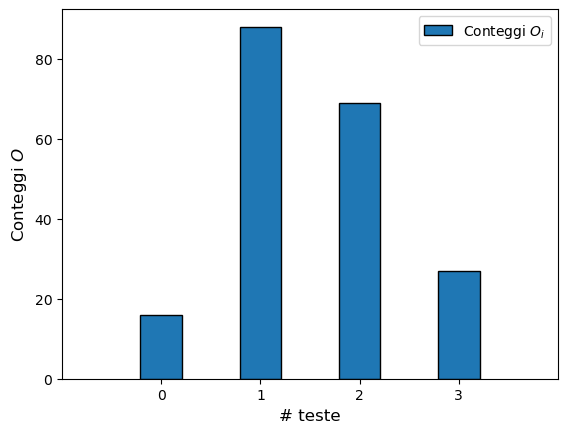

In [4]:
fig,ax = plt.subplots()

ax.set_xlim(-1,4)

ax.set_xticks([0,1,2,3])
ax.set_xlabel('# teste',fontsize=12)
ax.set_ylabel(r'Conteggi $O$',fontsize=12)

ax.bar([0,1,2,3],O,ec='k',width=0.42,label='Conteggi $O_i$')

ax.legend(loc='best')

Ci viene chiesto di valutare se le monete sono **truccate** o meno. 

**Ipotesi nulla $H_0$**: le monete non sono truccate.<br>
Fissiamo la soglia di significatività $\alpha=0.05$.

**Sotto l'ipotesi nulla**, le probabilità di ottenere i 4 possibili risultati sono date da `P_expt`. Avendo lanciato $N$ volte le tre monete, i **valori attesi** _se_ $H_0$ è vera sono $E_i = P(i)N$:

In [8]:
E = N*P_expt
print(E)

[25. 75. 75. 25.]


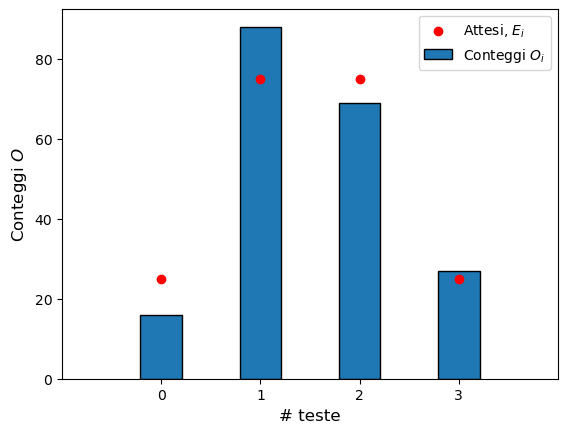

In [9]:
fig,ax = plt.subplots()

ax.set_xlim(-1,4)

ax.set_xticks([0,1,2,3])
ax.set_xlabel('# teste',fontsize=12)
ax.set_ylabel(r'Conteggi $O$',fontsize=12)

ax.bar([0,1,2,3],O,ec='k',width=0.42,label='Conteggi $O_i$')
ax.scatter([0,1,2,3],E,c='r',label='Attesi, $E_i$')

ax.legend(loc='best')

Per ogni numero di teste (0,1,2,4) $i$ avviene un esperimento di conteggio. Il numero di conteggi $O_i$ per il possibile risultato $i$ segue una statistica **poissoniana** con
1) **valore medio** $E_i$
2) **deviazione standard** $\sqrt{E_i}$

dove i valori $E_i$ sono i numeri di conteggi **attesi** per un numero $i$ di teste *se è vera* l'ipotesi nulla.

Se per $i$ abbiamo $O_i \gtrsim 5$, la Poissoniana è ben approssimata da una distribuzione **Gaussiana**, quindi la variabile casuale $O_i$ è una variabile (approssimativamente) gaussiana.<br>
Possiamo valutare se i valori **attesi** $E_i$ si adattano bene ai conteggi **osservati** $O_i$ calcolando il $\chi^2$:
$$
\chi^2_o=\sum_{i=1}^n \frac{(O_i-E_i)^2}{E_i}
$$
dove $n=4$ possibili risultati.

In [10]:
chisq_o = np.sum((O-E)**2/E)
print(chisq_o)

6.133333333333335


Abbiamo $n=4$ categorie in cui conteggiamo, il numero totale di conteggi è fissato a $N$. Il numero di **gradi di libertà** della distribuzione $\chi^2$ è

In [11]:
dof = len(O)-1
print(dof)

3


La probabilità di avere $P(\chi^2\geq\chi^2_o)$ si ottiene usando la PDF della distribuzione $\chi^2$ con 3 gradi di libertà

In [12]:
1-chi2.cdf(chisq_o, dof)

0.10530042407332507

$P(\chi^2\geq\chi_o^2)>\alpha$. Non possiamo rigettare l'ipotesi nulla.

Altre 3 monete diverse:

In [16]:
O2 = np.array([13, 60, 95, 32])
print(O2.sum())

200


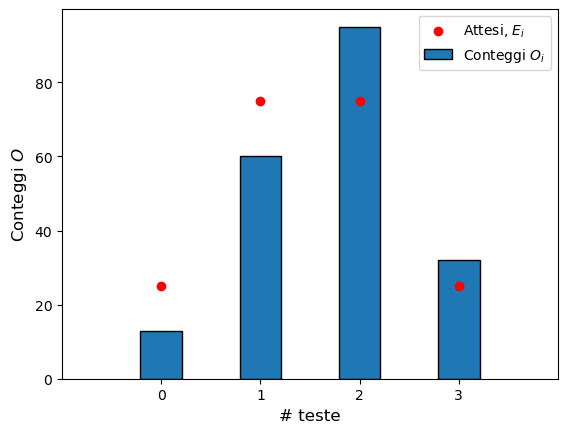

In [17]:
fig,ax = plt.subplots()

ax.set_xlim(-1,4)

ax.set_xticks([0,1,2,3])
ax.set_xlabel('# teste',fontsize=12)
ax.set_ylabel(r'Conteggi $O$',fontsize=12)

ax.bar([0,1,2,3],O2,ec='k',width=0.42,label='Conteggi $O_i$')
ax.scatter([0,1,2,3],E,c='r',label='Attesi, $E_i$')

ax.legend(loc='best')

In [18]:
chisq_o2 = np.sum((O2-E)**2/E)
print(chisq_o2)

16.053333333333335


In [19]:
1-chi2.cdf(chisq_o2, dof)

0.001105787792615831

# Test di una distribuzione

In [20]:
norm_data = np.loadtxt('./data/dati_misure.dat',unpack=True)

Numero totale di dati $N$:

In [21]:
N = len(norm_data)
print(N)

500


In [22]:
Oi, bins = np.histogram(norm_data,bins=np.arange(-2.25,2.75,.5))
print(bins)
print(Oi)

[-2.25 -1.75 -1.25 -0.75 -0.25  0.25  0.75  1.25  1.75  2.25]
[ 12  38  59  78 102  96  57  39  11]


In [29]:
center_bins = np.sum(np.vstack([bins[:-1],bins[1:]]),axis=0)/2.
print(center_bins)

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]


Il numero $n$ di *bin* in cui suddividiamo è

In [30]:
n = len(center_bins)
print(n)

9


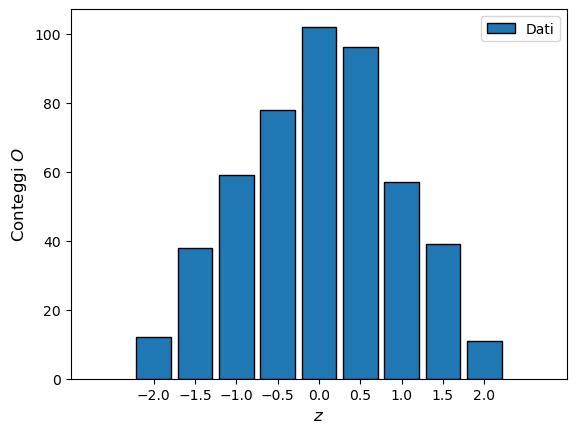

In [25]:
fig,ax = plt.subplots()

ax.set_xlim(-3,3)

ax.set_xticks(center_bins)
ax.set_xlabel('$z$',fontsize=12)
ax.set_ylabel(r'Conteggi $O$',fontsize=12)

ax.bar(center_bins,Oi,ec='k',width=0.42,label='Dati')

ax.legend(loc='upper right')

In ogni **bin** $i$ avviene un esperimento di conteggio: il numero di conteggi $O_i$ nel bin $i$ segue una statistica **poissoniana** con
1) **valore medio** $E_i$
2) **deviazione standard** $\sqrt{E_i}$

dove i valori $E_i$ sono i numeri di conteggi **attesi** nel bin $i$ *se è vera* l'ipotesi nulla.

**Ipotesi nulla:** i valori conteggiati di $z$ seguono una distribuzione gaussiana di media $\mu=0$ e $\sigma=1$:

$$\textup{PDF}(z)=\frac{1}{\sqrt{2\pi}}e^{-x^2}$$

Il numero totale di conteggi che ci **aspettiamo** nel bin $i$ è quindi

\begin{align}
E_i &= N\int_{z_{i-1}}^{z_i}\textup{PDF}(z)dz\\
&= N\left(\int_{-\infty}^{z_{i}}\textup{PDF}(z)dz - \int_{-\infty}^{z_{i-1}}\textup{PDF}(z)dz\right)\\
&= N\,\left[\textup{CDF}(z_i)-\textup{CDF}(z_{i-1})\right]
\end{align}

Se **nel bin** $O_i \gtrsim 5$, la Poissoniana è ben approssimata da una distribuzione **Gaussiana**, quindi la variabile casuale $O_i$ è una variabile (approssimativamente) gaussiana.

In [26]:
cdfs = norm.cdf(bins)
Ei = np.diff(cdfs)*N

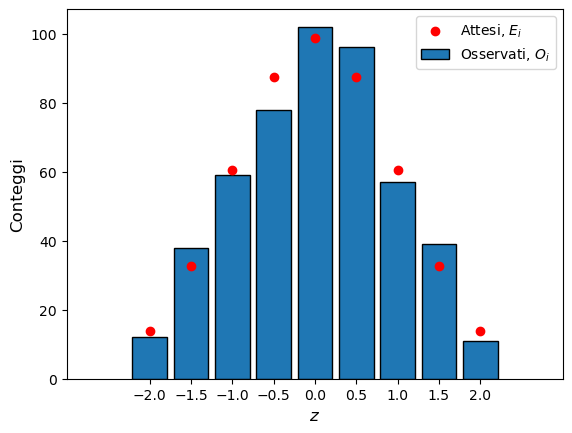

In [27]:
fig,ax = plt.subplots()

ax.set_xlim(-3,3)

ax.set_xticks(center_bins)
ax.set_xlabel('$z$',fontsize=12)
ax.set_ylabel(r'Conteggi',fontsize=12)

ax.bar(center_bins,Oi,ec='k',width=0.42,label='Osservati, $O_i$')
ax.scatter(center_bins,Ei,c='r',label='Attesi, $E_i$')

ax.legend(loc='upper right')

Possiamo valutare se i valori **attesi** $E_i$ si adattano bene ai **osservati** $O_i$ calcolando il $\chi^2$:
$$
\chi^2_o=\sum_{i=1}^n \frac{(O_i-E_i)^2}{E_i},
$$
dove $n=9$ è il numero di bin.

In [31]:
dof = n-1
print(dof)

8


In [32]:
chisq = np.sum((Oi-Ei)**2/Ei)
print(chisq)

5.080843092358302


In [33]:
1-chi2.cdf(chisq,dof)

0.7489016074528794

# Dadi truccati?

Lanciando 1000 volte **due dadi a 6 facce** si ottiengono i 1000 risultati raccolti nel file `./data/dadi.dat`.<br>
Usando il test statistico del $\chi^2$ possiamo concludere che il dado è truccato?

In [34]:
dadi = np.loadtxt('./data/dadi.dat')

In [35]:
print(len(dadi))
print(dadi)

1000
[ 6.  3.  2.  8.  6.  9. 10.  4.  7.  5.  4.  8.  7.  6.  8. 10.  9.  9.
  8. 10.  6.  6.  3.  3.  7.  5. 10.  5.  7.  6.  5. 12.  6.  5.  5.  9.
  7.  8.  4.  5.  3.  7.  7.  5.  8.  4.  6.  6.  6.  8.  9.  6.  7.  4.
  6.  7. 10.  8.  7.  6.  7. 10.  4.  5.  7.  6.  8.  6.  2.  6.  3. 10.
  5.  3.  6.  9.  9.  4.  6. 10.  6.  5.  8.  7.  4.  7.  7.  5. 11.  9.
 10.  8.  5.  9.  9. 10.  9.  8.  8.  7. 10.  8.  3.  8.  7.  4. 10.  8.
  8.  8.  2.  2.  7.  8.  5. 12.  3.  8.  7. 10. 10.  4.  9.  3. 12.  6.
  8.  4.  9.  8.  7.  8.  9.  3.  6.  5. 10.  9.  5.  7. 12.  6.  8.  3.
  5.  8. 11.  5.  3.  7.  5.  7. 10.  7.  7.  3.  5.  6.  6.  7.  7.  5.
  7.  5.  3.  9.  7.  6. 12.  3.  9.  6.  6.  8.  9.  6.  7.  4. 10.  9.
  7.  8.  7.  9. 11. 10.  9.  9. 10.  9.  9.  8.  6.  5.  5.  9.  7.  6.
 12.  9. 10.  4.  8.  7.  8. 10.  8.  7.  5.  8.  7.  5.  9.  3.  7.  5.
  8.  9.  8.  8.  7.  6.  8. 12.  7.  6.  7.  7. 10.  6.  5. 11.  9.  7.
  2.  9.  7.  8.  4. 10.  5. 10.  9.  3.  7.  

In [36]:
Oi, bins = np.histogram(dadi,np.arange(1.5,13))
center_bins = np.arange(2,13)
print(center_bins)

[ 2  3  4  5  6  7  8  9 10 11 12]


<BarContainer object of 11 artists>

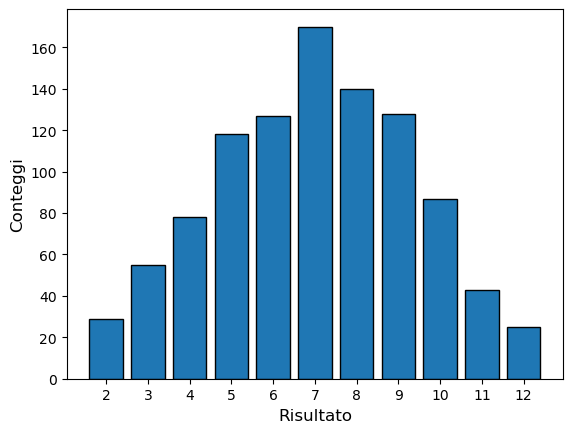

In [37]:
fig,ax = plt.subplots()

ax.set_xticks(range(2,13))
ax.set_xlabel('Risultato',fontsize=12)
ax.set_ylabel('Conteggi',fontsize=12)

ax.bar(center_bins,Oi,ec='k')

1) Quali sono i risultati che si possono ottenere lanciando 2 dadi a 6 facce?
2) Quanti sono i **conteggi osservati** $O_i$ per ciascun risultato?

**Ipotesi nulla:** i due dadi non sono truccati. Ciascuna faccia ha una probabilità 1/6.

3) Qual è la probabilità teorica $P_i$ di ottenere ciascun risultato usando **due dadi non truccati**?
4) Quali sono i **conteggi attesi** $E_i$ per ciascun risultato?
5) Usando un test del $\chi^2$ e scegliendo una significatività $\alpha=5\%$, possiamo **rigettare** l'ipotesi nulla?